# <center> Simulación caso de Negocio - Clustering </center>

El objetivo de esta actividad es diseñar e implementar un modelo de Clustering en Python para la resolución de un problema en el que cuenta con variables numéricas y categóricas y en el que se busca fortalecer los conocimientos teóricos y prácticos de la aplicación de las técnicas de segmentación en los negocios. 

💡 _**Nota**_: _Este material ha sido preparado por la **Universidad de las Américas - UDLA**. Parte del contenido ha sido adaptado a partir de material público liberado en [Kaggle](http://kaggle.com), [Datacamp](http://datacamp.com) y otros sitios web._

## Sobre la empresa

El siguiente caso de negocio es tomado de una e-commerce con sede en el Reino Unido conocida como **ACORA Group** especializada en la comercialización de productos de consumo masivo a través de su tienda online. La empresa cuenta con operaciones en varios países y tiene planes de expansión a nivel regional.

## 1. Evaluación de necesidades del negocio
La fase de evaluación del caso de negocio requiere que se cree, evalúe y apruebe un caso de negocio antes de proceder a las tareas reales de análisis práctico.

Uno de los desafíos que se ha planteado **ACORA Group** es segmentar sus clientes de manera que los esfuerzos comerciales de la empresa sean correctamente dirigidos en base a la misma información que genera la organización. 

# 2. Identificación de datos
La etapa de identificación de datos consiste en identificar los conjuntos de datos necesarios para el proyecto de análisis y sus fuentes.


**Dataset**

Este conjunto de datos contiene la información referente a las transacciones de compra de todas las tiendas de los 3 últimos años. 

**Diccionario de datos**

 * `InvoiceNo`: número de factura
 * `StockCode`: código del producto
 * `Description`: nombre del producto
 * `Quantity`: cantidad comprada
 * `UnitPrice`: precio unitario del producto
 * `CustomerID`: código del cliente
 * `Country`: país donde se registró la compra

# 3. Adquisición y filtrado de datos
Durante la etapa de adquisición y filtrado de datos se recopilan los datos de todas las fuentes de datos que se identificaron durante la etapa Identificación de datos.

El conjunto de datos planteado contiene información más de 150.000 transacciones de compra. Todos los datos se han recogido a través de los registros de compra realizados por todos sus clientes dentro de la página web de la e-commerce.

# 4. Extracción de datos
Durante esta etapa se debe extraer datos dispares y transformarlos en un formato que pueda facilitar el análisis de datos. 

**Importar librerías**
```Python
# Sintaxis general
import modulo as alias
- **modulo**: (módulo) librería a importar.
- **alias**: alias con el nos referiremos a la libería. 
Ejemplo: 
  - Importamos la librería pandas:
import pandas as pd
```

In [7]:
import pandas as pd

**Cargar el dataset**

```Python
Leemos un archivo usando el alias **pd**, luego punto **.**, y a seguir la función a utilizar **read_csv**.
Ejemplo:
df = pd.read_csv("data.csv")
```

In [13]:
df = pd.read_csv("/media/henryx/alldata/Maestri/maestria/big data negocios/semana 2/cluster/data.csv", encoding= 'unicode_escape')

# 5.Validación y limpieza de datos
Los datos no válidos pueden sesgar y falsear los resultados de los análisis. La etapa de validación y depuración de datos se enfoca en establecer reglas de validación a menudo complejas y a eliminar cualquier dato no válido conocido.

**EDA - Análisis exploratorio de datos**

In [32]:
# Identificar el tamaño del dataset
df.size
df.shape
# 

(541909, 8)

Existe un total de 541 909 registros y en total 8 campos.

In [26]:
# Indentificar el número de transacciones
# df.groupby('InvoiceNo').value_counts()
df['InvoiceNo'].value_counts().shape
# Exite un total de 25 900 transaciones

(25900,)

Existe un total de 25 900 transanciones.


In [27]:
# Indentificar el número de productos
df['StockCode'].value_counts().shape
# Usando el codigo del producto existe un total de 4070 productos.


(4070,)

**Limpieza de datos**

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


<AxesSubplot:>

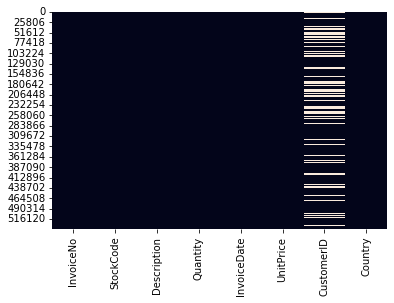

In [30]:
# Identificar si existen datos perdidos (NA, Nulls, etc.)
print(df.isnull().sum())

# 
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

Si existen datos perdidos, a perar de tener codigo el stock no tienen el nombre del producto. Eliminamos auquellos.


In [37]:
# Eliminar datos perdidos (NA, Nulls, etc.)
df = df.dropna(subset=['Description'])
df = df.dropna(subset=['CustomerID'])

**Transformación de datos**

In [38]:
# Calcular el valor total (cantidad * precio unitario)
df['total_val'] = df['UnitPrice'] * df['Quantity']
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_val
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [45]:
# Calcular el promedio y la suma del gasto total por cliente y el número de compras realizadas (agrupar por cliente)
df.groupby('CustomerID').agg(['sum', 'mean', 'count'])


/tmp/ipykernel_44263/1533201247.py:2: FutureWarning: ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('CustomerID').agg(['sum', 'mean', 'count'])


Quantity                  UnitPrice                 total_val  \
                sum       mean count       sum      mean count       sum   
CustomerID                                                                 
12346.0           0   0.000000     2      2.08  1.040000     2      0.00   
12347.0        2458  13.505495   182    481.21  2.644011   182   4310.00   
12348.0        2341  75.516129    31    178.71  5.764839    31   1797.24   
12349.0         631   8.643836    73    605.10  8.289041    73   1757.55   
12350.0         197  11.588235    17     65.30  3.841176    17    334.40   
...             ...        ...   ...       ...       ...   ...       ...   
18280.0          45   4.500000    10     47.65  4.765000    10    180.60   
18281.0          54   7.714286     7     39.36  5.622857     7     80.82   
18282.0          98   7.538462    13     62.68  4.821538    13    176.60   
18283.0        1397   1.847884   756   1220.93  1.614987   756   2094.88   
18287.0        1586  22.657143    70    104.55  1.493571    70   1837.28   

                             
                 mean count  
CustomerID                   
12346.0      0.000000     2  
12347.0     23.681319   182  
12348.0     57.975484    31  
12349.0     24.076027    73  
12350.0     19.670588    17  
...               ...   ...  
18280.0     18.060000    10  
18281.0     11.545714     7  
18282.0     13.584615    13  
18283.0      2.771005   756  
18287.0     26.246857    70  

[4372 rows x 9 columns]

# 6. Agregación y representación de datos
La etapa de agregación y representación de datos, se dedica a integrar múltiples conjuntos de datos para obtener una visión unificada.

In [48]:
# Evaluar si se requiere integrar otros datos para el análisis. 


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_val
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


Como los objetivos del estudio es segmentar a los clientes entonces no existe la necesidad de incorporar nuevos campos.

# 7. Análisis de datos
La etapa de análisis de datos se enfoca en llevar a cabo la tarea de análisis propiamente dicha, que suele implicar uno o más tipos de análisis

## Implementación modelo K-means

En esta sección se debe aplicar métodos de Clustering que te permitan definir el número adecuado de grupos en los que se va a dividir los datos. Se solicita usar el **método del codo** (elbow method) y el método **análisis de la silueta**.

⚠️ **Consideraciones:** Tomar en cuenta que una mala elección del número de Clusters podría generar pocos Clusters con datos muy heterogéneos o muchos Clusters con datos muy similares.

**Método del codo (Elbow Method)**

In [78]:
df1 = df[['Quantity','UnitPrice','CustomerID','total_val']]
int('4')
df.shape

(406829, 9)

In [76]:
df1.info()
def tryint(a):
    if a.isnumeric():
       return True
    else:
        return False
    


<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Quantity    406829 non-null  int64  
 1   UnitPrice   406829 non-null  float64
 2   CustomerID  406829 non-null  float64
 3   total_val   406829 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 15.5 MB
si es


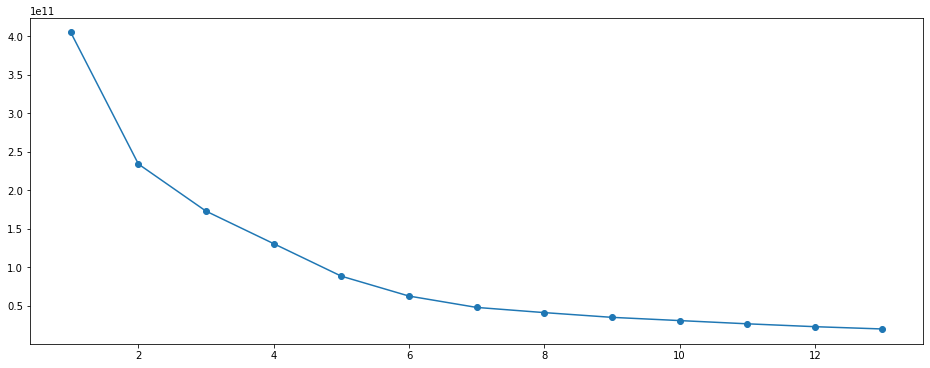

In [69]:
# Aplicar el método del codo
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

wcss = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters   = i, 
                    init         = 'k-means++', 
                    max_iter     = 300, 
                    n_init       = 10, 
                    random_state = 42)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
    
numero_clusteres = list(enumerate(wcss, start = 1))
metrica_wcss = np.array(numero_clusteres)
df_wcss= pd.DataFrame(data = metrica_wcss, columns = ['NUM_CLUSTERS','ERROR'], index = range(2, 15))

plt.figure(figsize=(16,6))
plt.plot(df_wcss.NUM_CLUSTERS, df_wcss.ERROR, marker = "o" );

Aplicando el metodo del codo notamos que la inercia del grupo disminuye a medida que aumentamos el número de grupos. Además, la caída de la inercia es mínima después de K = $, por lo que 4 puede considerarse como el número óptimo de grupos.

**Método de la silueta**

In [79]:
# Aplicar el método de la silueta
from sklearn.metrics import silhouette_score
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for i in range_n_clusters:
    kmeans = KMeans(n_clusters   = i, 
                    init         = 'k-means++', 
                    max_iter     = 300, 
                    n_init       = 10, 
                    random_state = 42)
    cluster_labels = kmeans.fit_predict(df1)
    silhouette_avg = silhouette_score(df1, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

### Entrenamiento del modelo K-means

In [ ]:
# Entrenamiento del modelo con el número de clústers óptimo
#El número de clústers
k=4
#Definición de parámetos del modelo
kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
#Entrenamiento del modelo
etiqueta = kmeans.fit(df1)

In [ ]:
# Imprimir los centroides de cada clúster


# 8. Visualización de datos
La capacidad de analizar grandes cantidades de datos y obtener información útil tiene poco valor si los únicos que pueden interpretar los resultados son los analistas.
La etapa de visualización de datos se dedica a utilizar técnicas y herramientas de visualización de datos para comunicar gráficamente los resultados del análisis con vistas a una interpretación eficaz por parte de los usuarios empresariales.

In [12]:
# Graficar la distribución de clientes por clúster


# 9. Utilización de los resultados del análisis
Después de que los resultados del análisis se pongan a disposición de los usuarios de negocio para apoyar la toma de decisiones empresariales, por ejemplo a través de cuadros de mando o paneles, puede haber más oportunidades para utilizar los resultados del análisis. La etapa de utilización de los resultados del análisis, esta enfocada en determinar cómo y dónde se pueden aprovechar más los datos del análisis procesado.

In [ ]:
# Haga un breve análisis de los hallazgos 


In [ ]:
# Detalle sus conclusiones sobre el modelo obtenido


In [ ]:
# Qué acciones sugerería a los directivos de la empresa?
